# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"
api_format = "json"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | luanda
Processing Record 4 of Set 1 | lerwick
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | coelho neto
Processing Record 10 of Set 1 | yangor
City not found. Skipping...
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | qaqortoq
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | nola
Processing Record 16 of Set 1 | laojunmiao
Processing Record 17 of Set 1 | walvis bay
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | g

Processing Record 38 of Set 4 | ust'-kulom
Processing Record 39 of Set 4 | haddington
Processing Record 40 of Set 4 | kingscliff
Processing Record 41 of Set 4 | muynoq
Processing Record 42 of Set 4 | fort bragg
Processing Record 43 of Set 4 | dawson creek
Processing Record 44 of Set 4 | harpanahalli
Processing Record 45 of Set 4 | macusani
Processing Record 46 of Set 4 | isafjordur
Processing Record 47 of Set 4 | atbara
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | bikenibeu village
Processing Record 0 of Set 5 | zheleznogorsk-ilimskiy
Processing Record 1 of Set 5 | zhengzhou
Processing Record 2 of Set 5 | atafu village
Processing Record 3 of Set 5 | feodosiya
Processing Record 4 of Set 5 | whitehorse
Processing Record 5 of Set 5 | ulsteinvik
Processing Record 6 of Set 5 | menongue
Processing Record 7 of Set 5 | morehead city
Processing Record 8 of Set 5 | peel
Processing Record 9 of Set 5 | badger
Processing Record 10 of Set 5 | ilomantsi
Processing Record

Processing Record 33 of Set 8 | sao vicente
Processing Record 34 of Set 8 | pleiku
Processing Record 35 of Set 8 | baharly
Processing Record 36 of Set 8 | kokpekty
Processing Record 37 of Set 8 | ahau
City not found. Skipping...
Processing Record 38 of Set 8 | jogeva
Processing Record 39 of Set 8 | northam
Processing Record 40 of Set 8 | baiti
Processing Record 41 of Set 8 | kloulklubed
Processing Record 42 of Set 8 | kharan
Processing Record 43 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 44 of Set 8 | horta
Processing Record 45 of Set 8 | forio
Processing Record 46 of Set 8 | taoudenni
Processing Record 47 of Set 8 | tsiombe
Processing Record 48 of Set 8 | new norfolk
Processing Record 49 of Set 8 | xilin hot
Processing Record 0 of Set 9 | tolanaro
Processing Record 1 of Set 9 | kingston
Processing Record 2 of Set 9 | vilyuchinsk
Processing Record 3 of Set 9 | mossel bay
Processing Record 4 of Set 9 | selsey
Processing Record 5 of Set 9 | tabou
Processing

Processing Record 20 of Set 12 | weligama
Processing Record 21 of Set 12 | bishopstoke
Processing Record 22 of Set 12 | bandarbeyla
Processing Record 23 of Set 12 | palu
Processing Record 24 of Set 12 | les avirons
Processing Record 25 of Set 12 | dingli
Processing Record 26 of Set 12 | mathba
Processing Record 27 of Set 12 | hpa-an
Processing Record 28 of Set 12 | kholmsk
Processing Record 29 of Set 12 | koneurgench
City not found. Skipping...
Processing Record 30 of Set 12 | puerto baquerizo moreno
Processing Record 31 of Set 12 | ciudad madero
Processing Record 32 of Set 12 | cabinda
Processing Record 33 of Set 12 | winnemucca
Processing Record 34 of Set 12 | labytnangi
Processing Record 35 of Set 12 | ohara
Processing Record 36 of Set 12 | manaquiri
Processing Record 37 of Set 12 | raduzhny
Processing Record 38 of Set 12 | hartsville
Processing Record 39 of Set 12 | viqueque
Processing Record 40 of Set 12 | olavarria
Processing Record 41 of Set 12 | afaahiti
Processing Record 42 of

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,-7.85,85,93,12.03,GL,1708727807
1,yellowknife,62.4560,-114.3525,12.42,96,100,18.41,CA,1708727565
2,ust'-ilimsk,58.0006,102.6619,-9.92,98,98,5.79,RU,1708727711
3,port lincoln,-34.7333,135.8667,64.69,60,44,15.41,AU,1708727808
4,mangrol,21.1167,70.1167,67.33,38,0,10.67,IN,1708727809


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-7.85,85,93,12.03,GL,1708727807
1,yellowknife,62.4560,-114.3525,12.42,96,100,18.41,CA,1708727565
2,ust'-ilimsk,58.0006,102.6619,-9.92,98,98,5.79,RU,1708727711
3,port lincoln,-34.7333,135.8667,64.69,60,44,15.41,AU,1708727808
4,mangrol,21.1167,70.1167,67.33,38,0,10.67,IN,1708727809


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

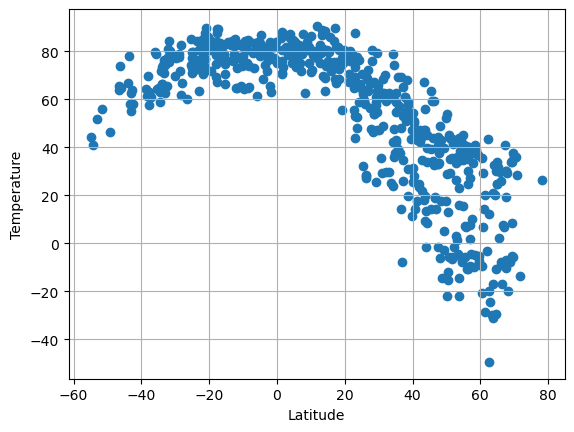

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Temperature")


# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

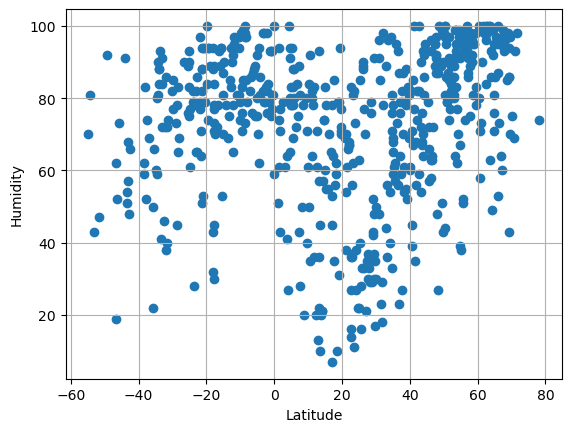

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

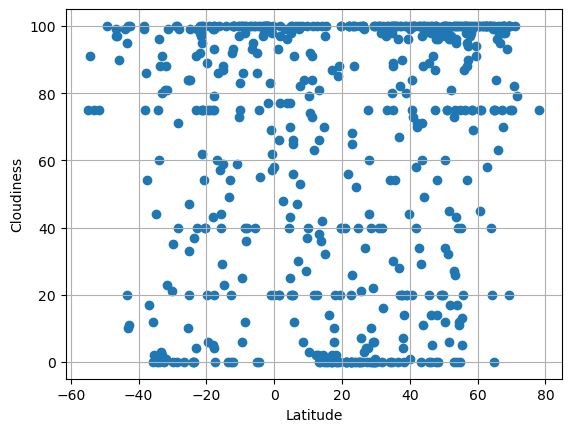

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [4]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("../Fig4.png")

# Show plot
plt.show()

NameError: name 'city_data_df' is not defined

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots (worked with Tutor Justin Moore on defining the function)
def regress(x_values, y_values, y_title):
    d_slope, d_int, d_r, d_p, d_std_err = linregress(x_values, y_values)
    d_fit = d_slope * x_values + d_int
    plt.scatter(x_values, y_values)
    plt.plot(x_values,d_fit,"--")
    #plt.xticks(year, rotation=90)
    plt.xlabel('Lat')
    plt.ylabel(y_title)
    print(d_r)
    plt.show()


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-7.85,85,93,12.03,GL,1708727807
1,yellowknife,62.4560,-114.3525,12.42,96,100,18.41,CA,1708727565
2,ust'-ilimsk,58.0006,102.6619,-9.92,98,98,5.79,RU,1708727711
4,mangrol,21.1167,70.1167,67.33,38,0,10.67,IN,1708727809
7,najran,17.4924,44.1277,66.85,35,6,2.62,SA,1708727810


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port lincoln,-34.7333,135.8667,64.69,60,44,15.41,AU,1708727808
5,port-aux-francais,-49.3500,70.2167,46.33,92,100,23.96,TF,1708727809
6,adamstown,-25.0660,-130.1015,79.52,75,84,9.35,PN,1708727809
8,west island,-12.1568,96.8225,82.38,78,100,10.36,CC,1708727810
9,avarua,-21.2078,-159.7750,80.65,94,100,12.66,CK,1708727810


###  Temperature vs. Latitude Linear Regression Plot

-0.8151899019031014


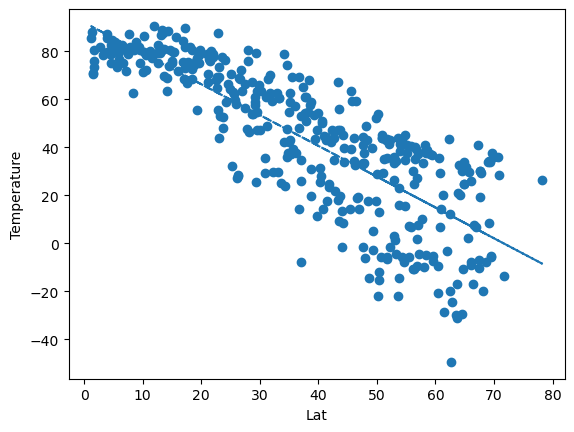

In [21]:
# Linear regression on Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

regress(x_values, y_values, 'Temperature')

0.563079687270305


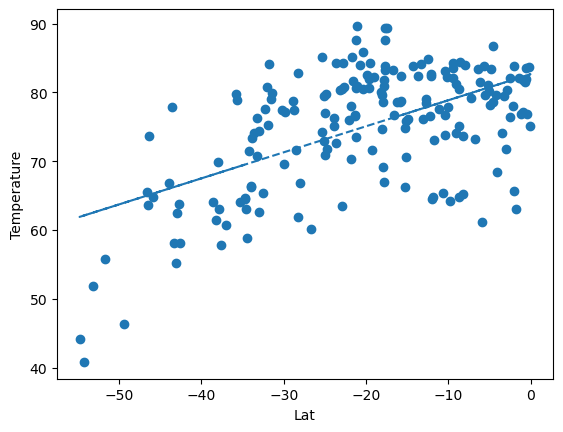

In [22]:
# Linear regression on Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

regress(x_values, y_values, 'Temperature')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

0.4247661036161543


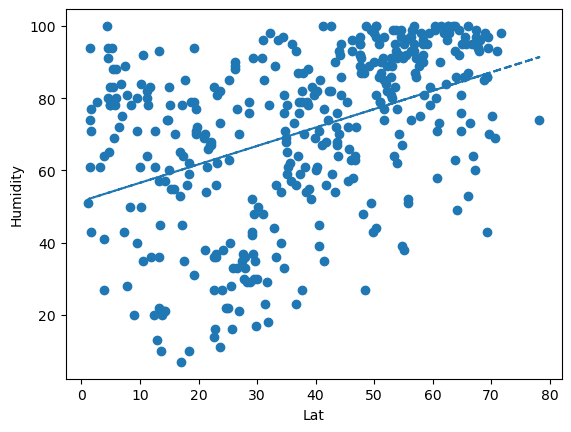

In [23]:
# Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


regress(x_values, y_values, 'Humidity')


0.43037265069323233


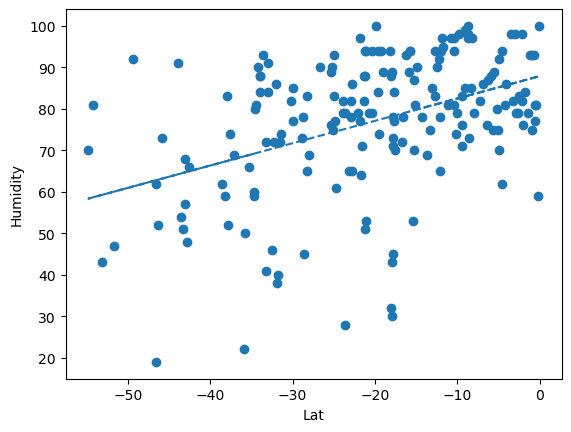

In [25]:
# Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

regress(x_values, y_values, 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

0.2963995661297389


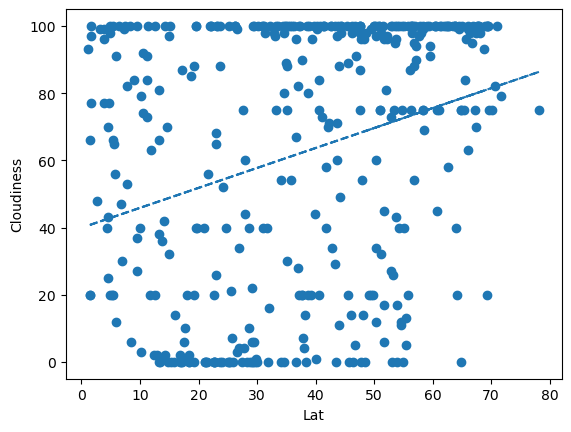

In [26]:
# Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

regress(x_values, y_values, 'Cloudiness')

0.1423279578020548


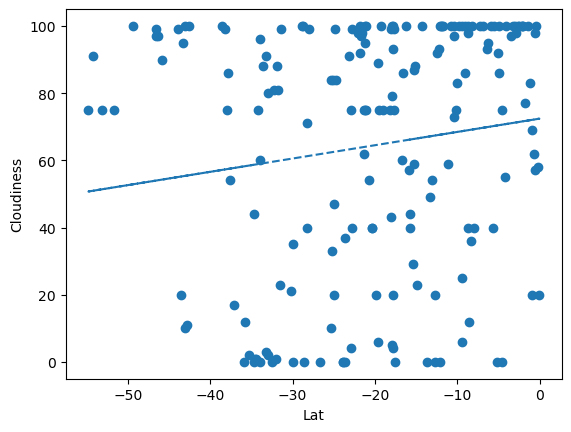

In [27]:
# Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

regress(x_values, y_values, 'Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

0.05109007587105419


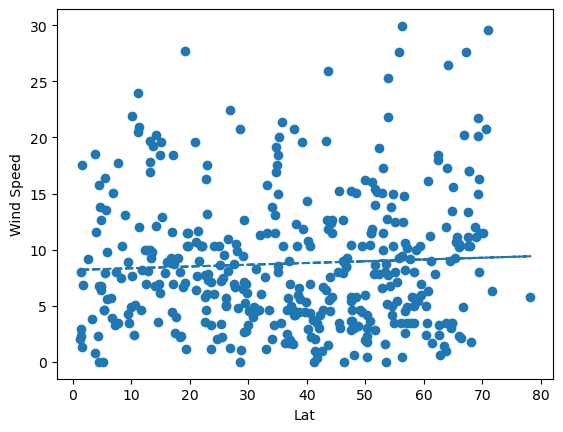

In [28]:
# Northern Hemisphere
# Plot scatter plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


regress(x_values, y_values, 'Wind Speed')

-0.3803995614873027


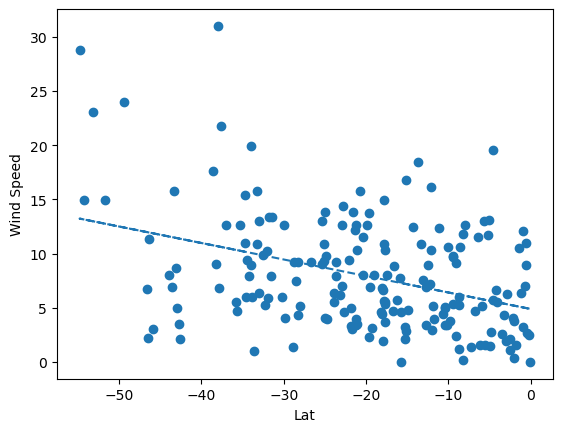

In [29]:
# Southern Hemisphere
# Plot scatter plot
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

regress(x_values, y_values, 'Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE